KNN Classification

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [47]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [48]:
# creating three data_frames
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

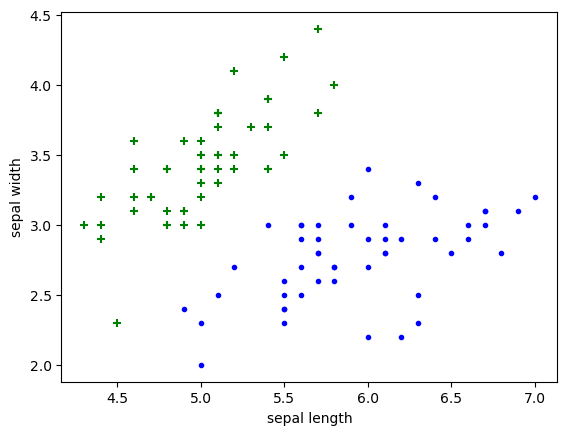

In [49]:
# visualizing Sentosa vs Versicolor wrt. sepal length & width
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')
plt.show()

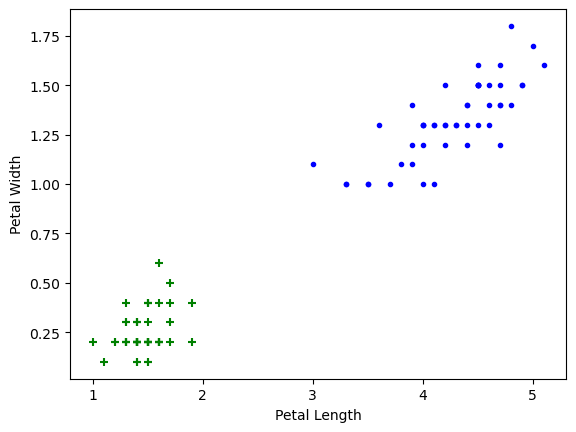

In [50]:
# visualizing sentosa and versicolor wrt. petal length and width
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target','flower_name'])
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(len(X_train),len(X_test))

120 30


In [52]:
# finding appropriate K Value

from sklearn.neighbors import KNeighborsClassifier

error1 = []
error2 = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train!=y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test!=y_pred2))
print(error1,error2)

[0.0, 0.025, 0.05, 0.041666666666666664, 0.041666666666666664, 0.041666666666666664, 0.03333333333333333, 0.016666666666666666, 0.025, 0.025, 0.025, 0.03333333333333333, 0.025, 0.025] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]


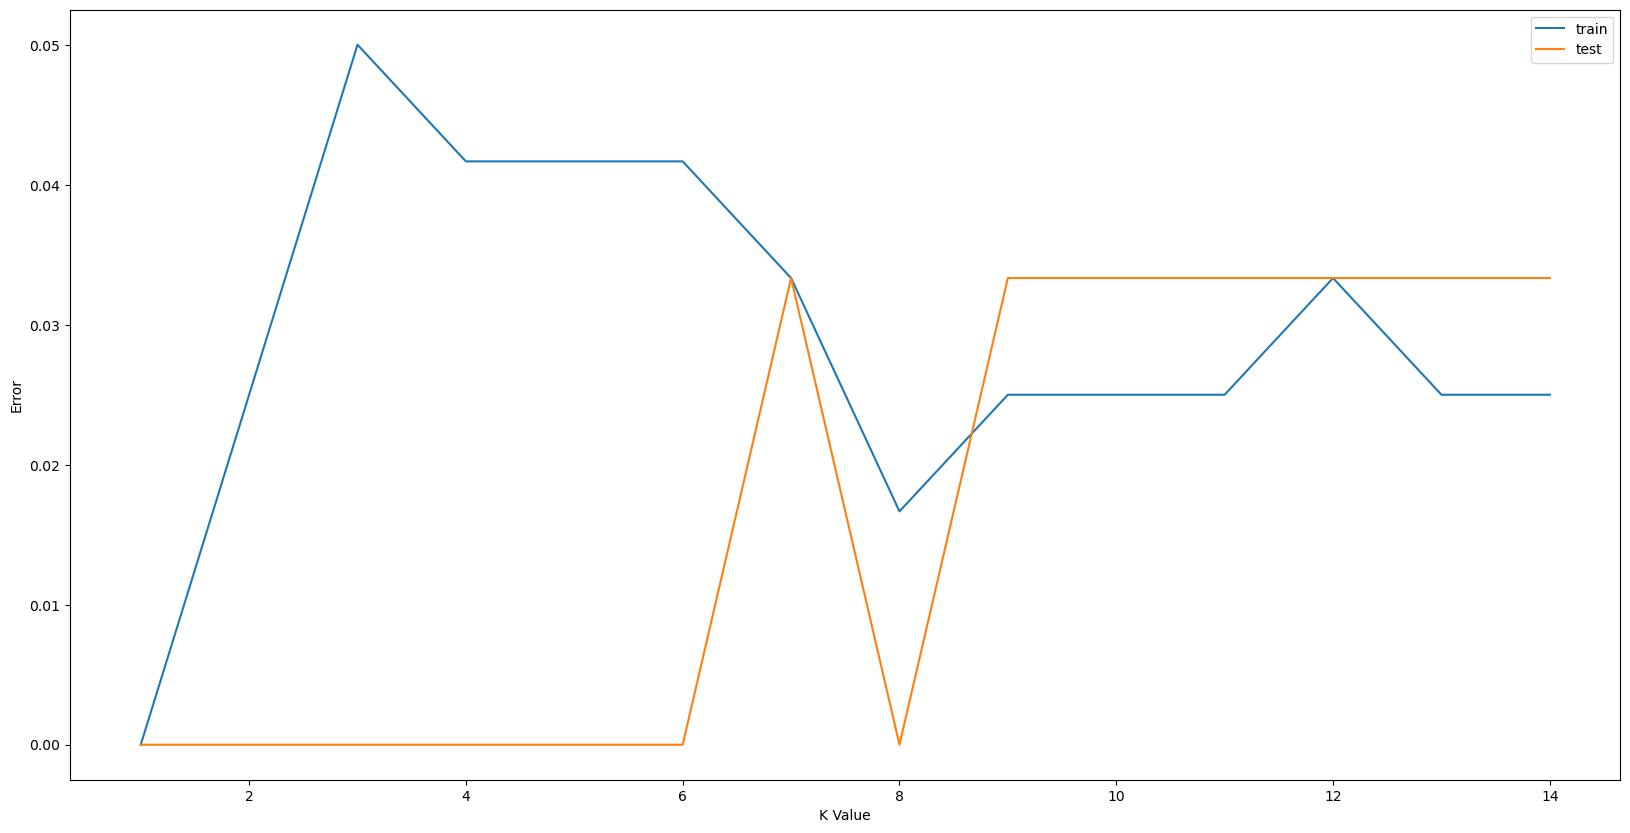

In [53]:
plt.figure(figsize=(20,10))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()
plt.show()

In [54]:
## Model Creation

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X,y)


KNeighborsClassifier(n_neighbors=8)

In [55]:
knn.score(X_test,y_test)

1.0

In [56]:
knn.predict([[4.8,3.0,1.5,0.3]])

c:\Users\sunci\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [57]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

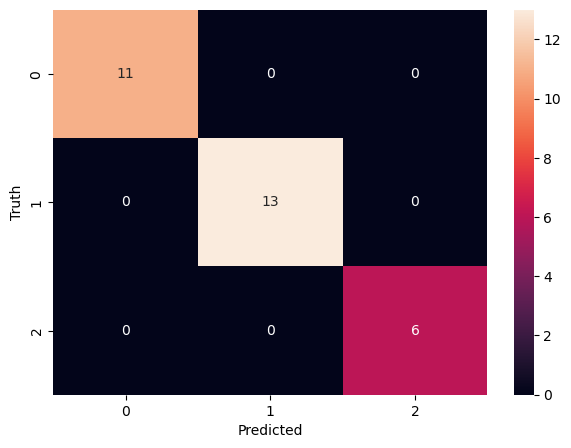

In [58]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



GERATING DATASETS

Blobs classification problem

In [60]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [63]:
X,y = make_blobs(n_samples=100,centers=2,n_features=2)
print(X,y)

[[  3.4638136   -6.04202732]
 [  2.3499856   -7.35504102]
 [ -2.99103957  -7.54927462]
 [  2.80795354  -6.97729902]
 [  3.29378835  -5.23421132]
 [ -3.96556712  -7.10820515]
 [  3.18607531  -8.27790254]
 [ -1.94588335  -7.03305852]
 [  1.69504936  -6.08120177]
 [  2.97985051  -5.16348628]
 [ -4.15421046 -10.1406798 ]
 [  2.68378781  -6.07059893]
 [  1.55667005  -6.51872379]
 [  3.46348919  -5.57102876]
 [ -3.51580433  -7.71735195]
 [ -2.70279331  -8.48643195]
 [  1.46917314  -5.70554376]
 [ -1.01790074  -8.51812971]
 [  2.74756948  -6.5335736 ]
 [  1.34766379  -9.39214904]
 [  3.07910047  -6.79472744]
 [ -1.52815342  -8.58816608]
 [ -2.89469133  -8.86200523]
 [ -1.00282347  -7.7427028 ]
 [ -4.26549442  -9.24065042]
 [ -5.16070891  -7.65126535]
 [  2.17327035  -6.01473411]
 [  2.24028697  -8.14992232]
 [  3.41560126  -7.04481742]
 [  2.94871737  -7.62521219]
 [ -3.26978459  -8.22123763]
 [ -3.31599449  -8.88485313]
 [ -0.96536662  -9.70744937]
 [ -2.24418723  -8.97811168]
 [  2.31918135

In [ ]:
df = DataFrame(dict())